In [7]:
import pandas as pd
import os
from result_analysis import get_number_of_unique_reactions, get_number_of_reactions, \
    run_mca, run_pca, create_binary_matrix, get_number_of_reactions_by_group, get_dfa_reactions, plot_pca, run_truncatedsvd, run_tsne, plot_tsne
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

DATAPATH = 'C:/Users/BiSBII/Documents/plantdb/reconstruction_results/vvinif2021/results_troppo/RNAseq'
MODELPATH = os.path.join(DATAPATH, 'reconstructed_models')

## different medium and biomass for each sample
uptake values for each tissue:

leaf:
- light: -100
- sucrose: -1
- CO2: -10000

berry and stem:
- light: 0
- sucrose: -1
- CO2: 0
- respiration biomass:
    - without chlorophyll A and B, plastoquinol-9 and, alpha-tocopherol in the cofactor reaction

berry mature:
 - reaction for carbohydrates includes anthocyanins and other secondary metabolites


# Models default

In [36]:
factor = {'leaf': 'leaf', 'stem': 'stem', 'berry_green': 'berry', 'berry_mature': 'berry'}

In [37]:
troppo_res_def_resp = 'stem_berry_green_berry_mature_fastcore_default.csv'
troppo_res_def_leaf = 'leaf_fastcore_default.csv'
output_file_def_resp = os.path.join(DATAPATH, troppo_res_def_resp)
output_file_def_leaf = os.path.join(DATAPATH, troppo_res_def_leaf)
df_def_resp = pd.read_csv(output_file_def_resp, index_col=0)
df_def_leaf = pd.read_csv(output_file_def_leaf, index_col=0)
df_def = pd.concat([df_def_resp, df_def_leaf])

index_t2 = [x for x in df_def.index if x.endswith('_t2')]
index_t3 = [x for x in df_def.index if x.endswith('_t3')]
index_t4 = [x for x in df_def.index if x.endswith('_t4')]

df_def_t2 = df_def.filter(items=index_t2, axis=0)
df_def_t3 = df_def.filter(items=index_t3, axis=0)
df_def_t4 = df_def.filter(items=index_t4, axis=0)

## threshold = 2

In [38]:
thr = '_t2'

tissues = {k + thr: v for k, v in factor.items()}
tissues

{'leaf_t2': 'leaf',
 'stem_t2': 'stem',
 'berry_green_t2': 'berry',
 'berry_mature_t2': 'berry'}

### Reactions in each model

In [39]:
number_of_reacs_def_t2, reactions_list_def_t2 = get_number_of_reactions(df_def_t2)
number_of_reacs_def_t2

,Number of reactions
stem_t2,3915
berry_green_t2,3933
berry_mature_t2,3724
leaf_t2,4047


### Unique reactions in each model

In [40]:
number_of_uniques_def_t2 = get_number_of_unique_reactions(reactions_list_def_t2)
number_of_uniques_def_t2

,Unique reactions
stem_t2,51
berry_green_t2,15
berry_mature_t2,24
leaf_t2,118


### Number of reactions and unique reactions by tissue

In [42]:
number_of_reacs_def_tissue_t2, reactions_list_def_tissue_t2 = get_number_of_reactions_by_group(df_def_t2, tissues)
number_of_reacs_def_tissue_t2

,Number of reactions
stem,3915
berry,3991
leaf,4047


In [43]:
number_of_uniques_def_tissue = get_number_of_unique_reactions(reactions_list_def_tissue_t2)
number_of_uniques_def_tissue

,Unique reactions
stem,51
berry,58
leaf,118


In [44]:
create_binary_matrix(df_def_t2, os.path.join(DATAPATH, 'all_samples_fastcore_default_t2.csv'))


In [45]:
bin_file_def_t2 = os.path.join(DATAPATH, 'all_samples_fastcore_default_t2_bin.csv')
df_bin_def_t2 = pd.read_csv(bin_file_def_t2, index_col= 0)

In [46]:
df_mca_def_t2, explained_inertia_def = run_mca(n_components=2, data=df_bin_def_t2)
df_mca_def_t2

,PC 1,PC 2
stem_t2,-0.076322,0.350831
berry_green_t2,-0.005565,-0.022781
berry_mature_t2,0.385031,-0.105782
leaf_t2,-0.303143,-0.222267


In [47]:
df_mca_def_t2['factor'] = ['stem', 'berry_green', 'berry_mature', 'leaf']

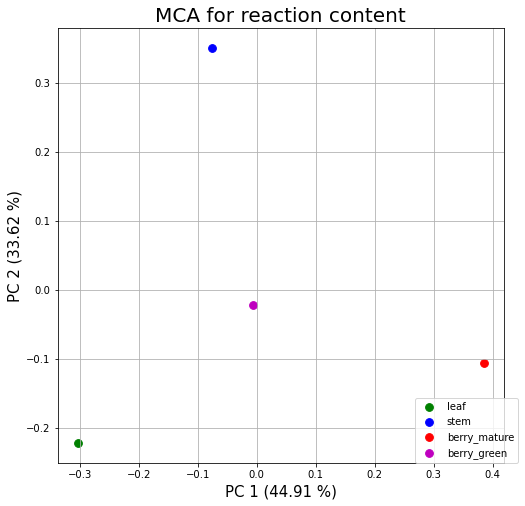

In [48]:
plot_pca(data=df_mca_def_t2, explained_variance=explained_inertia_def, c1='PC 1', c2='PC 2',
         title='MCA for reaction content', name_fig='mca_default_t2')

## threshold = 3

In [49]:
thr = '_t3'

tissues = {k + thr: v for k, v in factor.items()}
tissues

{'leaf_t3': 'leaf',
 'stem_t3': 'stem',
 'berry_green_t3': 'berry',
 'berry_mature_t3': 'berry'}

### Reactions in each model

In [50]:
number_of_reacs_def_t3, reactions_list_def_t3 = get_number_of_reactions(df_def_t3)
number_of_reacs_def_t3

,Number of reactions
stem_t3,3643
berry_green_t3,3748
berry_mature_t3,3507
leaf_t3,3896


### Unique reactions in each model

In [51]:
number_of_uniques_def_t3 = get_number_of_unique_reactions(reactions_list_def_t3)
number_of_uniques_def_t3

,Unique reactions
stem_t3,68
berry_green_t3,23
berry_mature_t3,14
leaf_t3,202


### Number of reactions and unique reactions by tissue

In [52]:
number_of_reacs_def_tissue_t3, reactions_list_def_tissue_t3 = get_number_of_reactions_by_group(df_def_t3, tissues)
number_of_reacs_def_tissue_t3

,Number of reactions
stem,3643
berry,3795
leaf,3896


In [53]:
number_of_uniques_def_tissue_t3 = get_number_of_unique_reactions(reactions_list_def_tissue_t3)
number_of_uniques_def_tissue_t3

,Unique reactions
stem,68
berry,64
leaf,202


In [54]:
create_binary_matrix(df_def_t3, os.path.join(DATAPATH, 'all_samples_fastcore_default_t3.csv'))

In [55]:
bin_file_def_t3 = os.path.join(DATAPATH, 'all_samples_fastcore_default_t3_bin.csv')
df_bin_def_t3 = pd.read_csv(bin_file_def_t3, index_col= 0)

In [56]:
df_mca_def_t3, explained_inertia_def_t3 = run_mca(n_components=2, data=df_bin_def_t3)
df_mca_def_t3

,PC 1,PC 2
stem_t3,-0.229563,0.380904
berry_green_t3,-0.032854,-0.085147
berry_mature_t3,-0.205826,-0.331019
leaf_t3,0.468243,0.035263


In [57]:
df_mca_def_t3['factor'] = ['stem', 'berry_green', 'berry_mature', 'leaf']

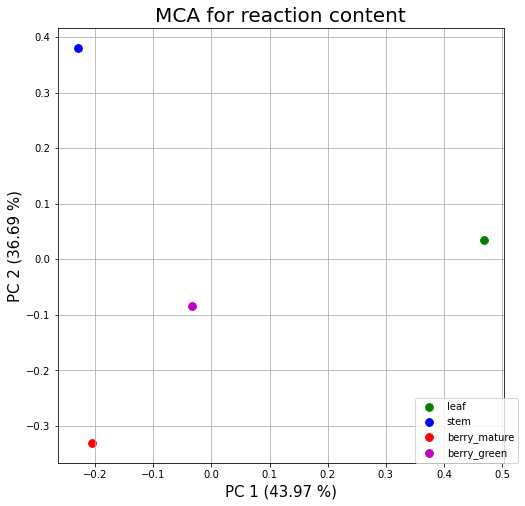

In [58]:
plot_pca(data=df_mca_def_t3, explained_variance=explained_inertia_def_t3, c1='PC 1', c2='PC 2',
         title='MCA for reaction content', name_fig='mca_default_t3')

## threshold = 4

In [59]:
thr = '_t4'

tissues = {k + thr: v for k, v in factor.items()}
tissues

{'leaf_t4': 'leaf',
 'stem_t4': 'stem',
 'berry_green_t4': 'berry',
 'berry_mature_t4': 'berry'}

### Reactions in each model

In [60]:
number_of_reacs_def_t4, reactions_list_def_t4 = get_number_of_reactions(df_def_t4)
number_of_reacs_def_t4

,Number of reactions
stem_t4,3290
berry_green_t4,3432
berry_mature_t4,3150
leaf_t4,3450


### Unique reactions in each model

In [61]:
number_of_uniques_def_t4 = get_number_of_unique_reactions(reactions_list_def_t4)
number_of_uniques_def_t4

,Unique reactions
stem_t4,118
berry_green_t4,49
berry_mature_t4,28
leaf_t4,203


### Number of reactions and unique reactions by tissue

In [62]:
number_of_reacs_def_tissue_t4, reactions_list_def_tissue_t4 = get_number_of_reactions_by_group(df_def_t4, tissues)
number_of_reacs_def_tissue_t4

,Number of reactions
stem,3290
berry,3523
leaf,3450


In [63]:
number_of_uniques_def_tissue_t4 = get_number_of_unique_reactions(reactions_list_def_tissue_t4)
number_of_uniques_def_tissue_t4

,Unique reactions
stem,118
berry,167
leaf,203


In [64]:
create_binary_matrix(df_def_t4, os.path.join(DATAPATH, 'all_samples_fastcore_default_t4.csv'))

In [65]:
bin_file_def_t4 = os.path.join(DATAPATH, 'all_samples_fastcore_default_t4_bin.csv')
df_bin_def_t4 = pd.read_csv(bin_file_def_t4, index_col= 0)

In [66]:
df_mca_def_t4, explained_inertia_def_t4 = run_mca(n_components=2, data=df_bin_def_t4)
df_mca_def_t4

,PC 1,PC 2
stem_t4,-0.200601,0.481777
berry_green_t4,-0.092095,-0.184103
berry_mature_t4,-0.265428,-0.298498
leaf_t4,0.558124,0.000825


In [67]:
df_mca_def_t4['factor'] = ['stem', 'berry_green', 'berry_mature', 'leaf']

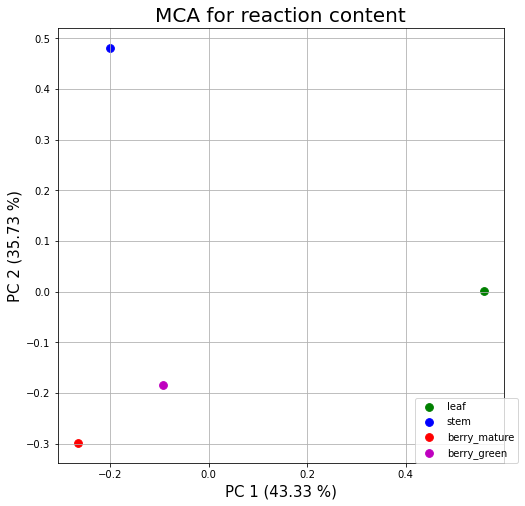

In [68]:
plot_pca(data=df_mca_def_t4, explained_variance=explained_inertia_def_t4, c1='PC 1', c2='PC 2',
         title='MCA for reaction content', name_fig='mca_default_t4')

## PCA for reaction fluxes

In [86]:
fluxes_file_def = os.path.join(MODELPATH, 'model_fluxes_default_update.csv')
df_fluxes_def = pd.read_csv(fluxes_file_def, index_col= 0)

,EX_FE+2_drain,EX_MG+2_drain,EX_WATER_drain,EX_OXYGEN-MOLECULE_drain,EX_PROTON_drain,EX_Pi_drain,EX_CARBON-DIOXIDE_drain,EX_NITRATE_drain,EX_SULFATE_drain,EX_Light_drain,...,1.14.13.76-RXN__er,RXN-15536__cyto,RXN-16368__cyto,1.14.99.37-RXN__er,EX_CPD-13764_drain,T_CPD-13764__cyto,RXN-12853__cyto,RXN-12582__chlo,EX_THIAMINE-P_drain,T_THIAMINE-P__cyto
berry_green_t2,-0.000002,0.000000,4.798890,-2.792487,-9.869765,0.136501,4.798890,-0.560374,-0.023557,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
berry_green_t3,-0.000002,0.000000,4.798890,-2.792487,-9.869765,0.136501,4.798890,-0.560374,-0.023557,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
berry_green_t4,-0.000002,0.000000,4.788494,-2.778914,-9.882276,0.136675,4.788494,-0.561085,-0.023587,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
berry_mature_t2,-0.000002,0.000000,4.788574,-2.779018,-9.882180,0.136673,4.788574,-0.561079,-0.023587,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
berry_mature_t3,-0.000002,0.000000,4.788444,-2.778849,-9.882336,0.136675,4.788444,-0.561088,-0.023587,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
berry_mature_t4,-0.000002,0.000000,4.830239,-2.833417,-9.832037,0.135980,4.830239,-0.558232,-0.023467,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
leaf_t2,-0.000004,-0.000005,-9.686682,16.199322,-20.382908,0.316232,-14.993090,0.000000,-0.054575,-100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
leaf_t3,-0.000004,-0.000005,-9.686676,16.199311,-20.382894,0.316231,-14.993080,0.000000,-0.054575,-100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
leaf_t4,-0.000004,-0.000005,-9.686676,16.199311,-20.382894,0.316231,-14.993080,0.000000,-0.054575,-100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stem_t2,-0.000002,0.000000,4.788574,-2.779018,-9.882180,0.136673,4.788574,-0.561079,-0.023587,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
fluxes_t2 = [x for x in df_fluxes_def.index if x.endswith('_t2')]
fluxes_t3 = [x for x in df_fluxes_def.index if x.endswith('_t3')]
fluxes_t4 = [x for x in df_fluxes_def.index if x.endswith('_t4')]

In [88]:
df_fluxes_def_t2 = df_fluxes_def.filter(items=fluxes_t2, axis=0)
df_fluxes_def_t3 = df_fluxes_def.filter(items=fluxes_t3, axis=0)
df_fluxes_def_t4 = df_fluxes_def.filter(items=fluxes_t4, axis=0)
df_fluxes_def_t2

,EX_FE+2_drain,EX_MG+2_drain,EX_WATER_drain,EX_OXYGEN-MOLECULE_drain,EX_PROTON_drain,EX_Pi_drain,EX_CARBON-DIOXIDE_drain,EX_NITRATE_drain,EX_SULFATE_drain,EX_Light_drain,...,1.14.13.76-RXN__er,RXN-15536__cyto,RXN-16368__cyto,1.14.99.37-RXN__er,EX_CPD-13764_drain,T_CPD-13764__cyto,RXN-12853__cyto,RXN-12582__chlo,EX_THIAMINE-P_drain,T_THIAMINE-P__cyto
berry_green_t2,-0.000002,0.000000,4.798890,-2.792487,-9.869765,0.136501,4.798890,-0.560374,-0.023557,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
berry_mature_t2,-0.000002,0.000000,4.788574,-2.779018,-9.882180,0.136673,4.788574,-0.561079,-0.023587,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
leaf_t2,-0.000004,-0.000005,-9.686682,16.199322,-20.382908,0.316232,-14.993090,0.000000,-0.054575,-100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stem_t2,-0.000002,0.000000,4.788574,-2.779018,-9.882180,0.136673,4.788574,-0.561079,-0.023587,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
scaler = StandardScaler()

fluxes_def_t2_scaled = scaler.fit_transform(df_fluxes_def_t2)
df_fluxes_def_t2_scaled = pd.DataFrame(fluxes_def_t2_scaled, columns=df_fluxes_def_t2.columns,
                                       index=df_fluxes_def_t2.index)

fluxes_def_t3_scaled = scaler.fit_transform(df_fluxes_def_t3)
df_fluxes_def_t3_scaled = pd.DataFrame(fluxes_def_t3_scaled, columns=df_fluxes_def_t4.columns,
                                       index=df_fluxes_def_t4.index)

fluxes_def_t4_scaled = scaler.fit_transform(df_fluxes_def_t4)
df_fluxes_def_t4_scaled = pd.DataFrame(fluxes_def_t4_scaled, columns=df_fluxes_def_t4.columns,
                                       index=df_fluxes_def_t4.index)

### threshold = 2

In [90]:
df_pca_fluxes_def_t2, explained_variance_def_t2 = run_pca(n_components=2, data=df_fluxes_def_t2_scaled)

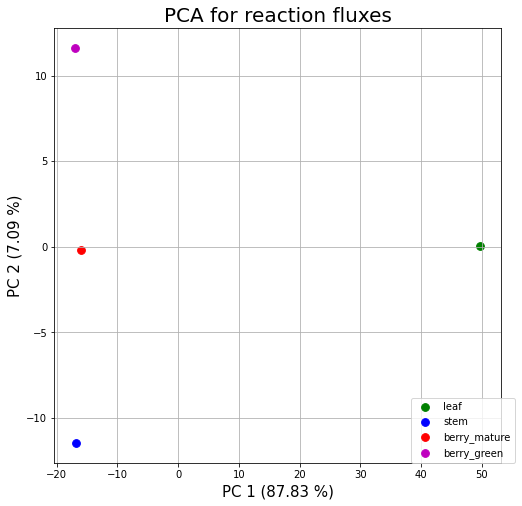

In [91]:
df_pca_fluxes_def_t2['factor'] = ['berry_green', 'berry_mature', 'leaf', 'stem']

plot_pca(data=df_pca_fluxes_def_t2, explained_variance=explained_variance_def_t2, c1='PC 1', c2='PC 2',
         title='PCA for reaction fluxes', name_fig='pca_default_t2')

### threshold = 3

In [92]:
df_pca_fluxes_def_t3, explained_variance_def_t3 = run_pca(n_components=2, data=df_fluxes_def_t3_scaled)


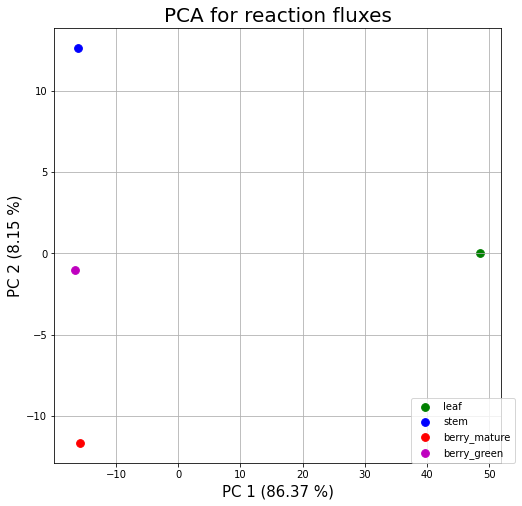

In [93]:
df_pca_fluxes_def_t3['factor'] = ['berry_green', 'berry_mature', 'leaf', 'stem']

plot_pca(data=df_pca_fluxes_def_t3, explained_variance=explained_variance_def_t3, c1='PC 1', c2='PC 2',
         title='PCA for reaction fluxes', name_fig='pca_default_t3')

### threshold = 4

In [94]:
df_pca_fluxes_def_t4, explained_variance_def_t4 = run_pca(n_components=2, data=df_fluxes_def_t4_scaled)

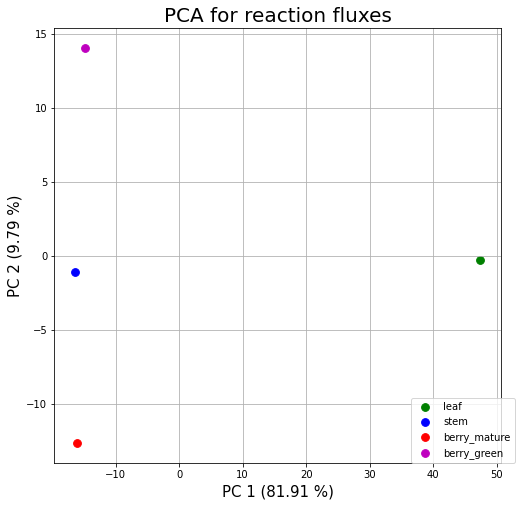

In [95]:
df_pca_fluxes_def_t4['factor'] = ['berry_green', 'berry_mature', 'leaf', 'stem']

plot_pca(data=df_pca_fluxes_def_t4, explained_variance=explained_variance_def_t4, c1='PC 1', c2='PC 2',
         title='PCA for reaction fluxes', name_fig='pca_default_t4')

## PCA for reaction fluxes for differentially expressed reactions

In [96]:
diff_reacs_t4 = get_dfa_reactions(folder='default_t4')

In [97]:
df_fluxes_t4_diff = df_fluxes_def_t4_scaled[diff_reacs_t4]
df_fluxes_t4_diff.shape

(4, 600)

In [98]:
df_pca_fluxes_t4, explained_variance_def_t4 = run_pca(n_components=2, data=df_fluxes_t4_diff)
df_pca_fluxes_t4

,PC 1,PC 2
berry_green_t4,-7.561119,-4.468859
berry_mature_t4,-7.534954,10.094126
leaf_t4,23.587572,-0.171381
stem_t4,-8.491499,-5.453886


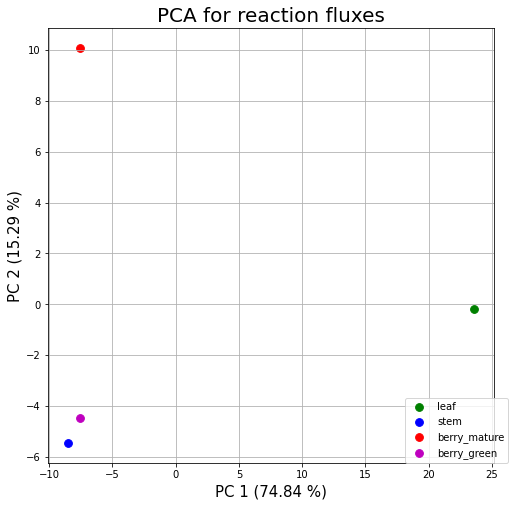

In [99]:
df_pca_fluxes_t4['factor'] = ['berry_green', 'berry_mature', 'leaf', 'stem']

plot_pca(data=df_pca_fluxes_t4, explained_variance=explained_variance_def_t4, c1='PC 1', c2='PC 2',
         title='PCA for reaction fluxes', name_fig='pca_def_t4_diff_scaled')

## PCA for sampling fluxes for differentially expressed reactions

In [102]:
sampling_file_t4 = os.path.join(MODELPATH, 'all_sampling_default.csv')
df_sampling_t4 = pd.read_csv(sampling_file_t4, index_col= 0)
df_sampling_t4.shape

(4000, 3942)

In [103]:
df_sampling_t4 = df_sampling_t4[diff_reacs_t4]
df_sampling_t4.shape

(4000, 600)

In [104]:
sampling_t4_scaled = scaler.fit_transform(df_sampling_t4)
df_sampling_t4_scaled = pd.DataFrame(sampling_t4_scaled, columns=df_sampling_t4.columns,
                                     index=df_sampling_t4.index)

In [105]:
df_pca_sampling_t4, explained_variance_t4 = run_pca(n_components=2, data=df_sampling_t4_scaled)
df_pca_sampling_t4

,PC 1,PC 2
berry_green_sampling.csv_0,-2.908516,-5.950812
berry_green_sampling.csv_1,-3.165616,-5.966849
berry_green_sampling.csv_2,-3.866459,-5.516074
berry_green_sampling.csv_3,-3.654471,-4.833619
berry_green_sampling.csv_4,-3.811936,-5.075060
...,...,...
stem_sampling.csv_995,-6.593089,-11.056869
stem_sampling.csv_996,-6.685420,-11.144523
stem_sampling.csv_997,-6.914042,-10.916847
stem_sampling.csv_998,-6.919162,-10.847049


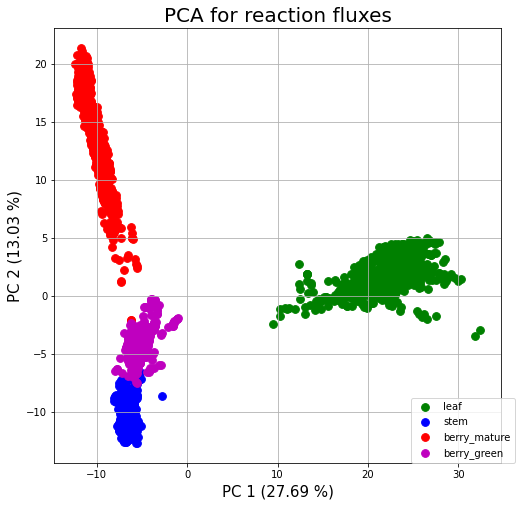

In [106]:
df_pca_sampling_t4['factor'] =  ['berry_green'] * 1000 + ['berry_mature'] * 1000 \
                                + ['leaf'] * 1000 + ['stem'] * 1000

plot_pca(data=df_pca_sampling_t4, explained_variance=explained_variance_t4, c1='PC 1', c2='PC 2',
         title='PCA for reaction fluxes', name_fig='pca_default_t4_diff_sampling_scaled')

# Local2

In [2]:
troppo_res_local2_resp = 'berry_green_stem_fastcore_Local2_0_1_4.csv'
troppo_res_local2_leaf = 'leaf_fastcore_Local2_0_1_4.csv'
troppo_res_local2_mature = 'berry_mature_fastcore_Local2_0_1_4.csv'
output_file_local2_resp = os.path.join(DATAPATH, troppo_res_local2_resp)
output_file_local2_leaf = os.path.join(DATAPATH, troppo_res_local2_leaf)
output_file_local2_mature = os.path.join(DATAPATH, troppo_res_local2_mature)
df_local2_resp = pd.read_csv(output_file_local2_resp, index_col=0)
df_local2_leaf = pd.read_csv(output_file_local2_leaf, index_col=0)
df_local2_mature = pd.read_csv(output_file_local2_mature, index_col=0)
df_local2 = pd.concat([df_local2_resp, df_local2_leaf, df_local2_mature])
df_local2

,EX_FE+2_drain,EX_MG+2_drain,EX_WATER_drain,EX_OXYGEN-MOLECULE_drain,EX_PROTON_drain,EX_Pi_drain,EX_CARBON-DIOXIDE_drain,EX_NITRATE_drain,EX_SULFATE_drain,EX_Light_drain,...,EX_CPD-13509_drain,EX_RUTIN_drain,EX_CPD-14981_drain,T_MG+2__chlo,T_CPD-734__cyto,EX_CPD-734_drain,DIMETHYLALLYLCISTRANSFERASE-RXN__cyto,T_MG+2__cyto,R06550__cyto,R06549__cyto
berry_green_t0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,True,False,False,False
stem_t0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,True,False,False,False
leaf_t0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,True,False,False,True,True,False,False
berry_mature_t0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,True,False,True,True


In [3]:
tissues = {'leaf_t0': 'leaf', 'stem_t0': 'stem', 'berry_green_t0': 'berry', 'berry_mature_t0': 'berry'}
tissues

{'leaf_t0': 'leaf',
 'stem_t0': 'stem',
 'berry_green_t0': 'berry',
 'berry_mature_t0': 'berry'}

### Reactions in each model

In [4]:
number_of_reacs_local2, reactions_list_local2 = get_number_of_reactions(df_local2)
number_of_reacs_local2

,Number of reactions
berry_green_t0,3432
stem_t0,3452
leaf_t0,3627
berry_mature_t0,3189


### Unique reactions in each model

In [5]:
number_of_uniques_local2 = get_number_of_unique_reactions(reactions_list_local2)
number_of_uniques_local2

,Unique reactions
berry_green_t0,58
stem_t0,166
leaf_t0,207
berry_mature_t0,26


### Number of reactions and unique reactions by tissue

In [9]:
number_of_reacs_tissue_local2, reactions_list_tissue_local2 = get_number_of_reactions_by_group(df_local2, tissues)
number_of_reacs_tissue_local2

,Number of reactions
stem,3500
berry,3542
leaf,3619


In [10]:
number_of_uniques_tissue_local2 = get_number_of_unique_reactions(reactions_list_tissue_local2)
number_of_uniques_tissue_local2

,Unique reactions
stem,150
berry,92
leaf,174


In [6]:
create_binary_matrix(df_local2, os.path.join(DATAPATH, 'all_samples_fastcore_local2.csv'))

In [7]:
bin_file_local2 = os.path.join(DATAPATH, 'all_samples_fastcore_local2_bin.csv')
df_bin_local2 = pd.read_csv(bin_file_local2, index_col= 0)

In [8]:
df_mca_local2, explained_inertia_local2 = run_mca(n_components=2, data=df_bin_local2)
df_mca_local2

,PC 1,PC 2
berry_green_t0,-0.148002,-0.141033
stem_t0,0.530712,0.030578
leaf_t0,-0.211095,0.459606
berry_mature_t0,-0.171615,-0.349151


In [9]:
df_mca_local2['factor'] = ['berry_green', 'stem', 'leaf', 'berry_mature']

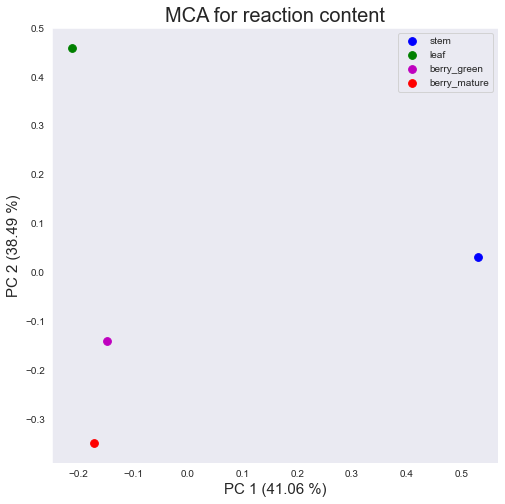

In [10]:
c1 = 'PC 1'
c2 = 'PC 2'
plot_pca(data=df_mca_local2, explained_variance=explained_inertia_local2, c1=c1, c2=c2, title='MCA for reaction content',
         name_fig='mca_local2')


## PCA for reaction fluxes

In [12]:
fluxes_file_local2 = os.path.join(MODELPATH, 'model_fluxes.csv')
df_fluxes_local2 = pd.read_csv(fluxes_file_local2, index_col= 0)

In [13]:
scaler = StandardScaler()

fluxes_def_local2_scaled = scaler.fit_transform(df_fluxes_local2)
df_fluxes_def_local2_scaled = pd.DataFrame(fluxes_def_local2_scaled, columns=df_fluxes_local2.columns,
                                       index=df_fluxes_local2.index)


In [15]:
df_pca_fluxes_local2, explained_variance_local2, names, loadings = run_pca(n_components=2, data=df_fluxes_def_local2_scaled)
df_pca_fluxes_local2

,PC 1,PC 2
berry_green,-9.781619,0.226376
berry_mature,-22.783387,-15.808633
leaf,42.223627,-3.998608
stem,-9.658621,19.580865


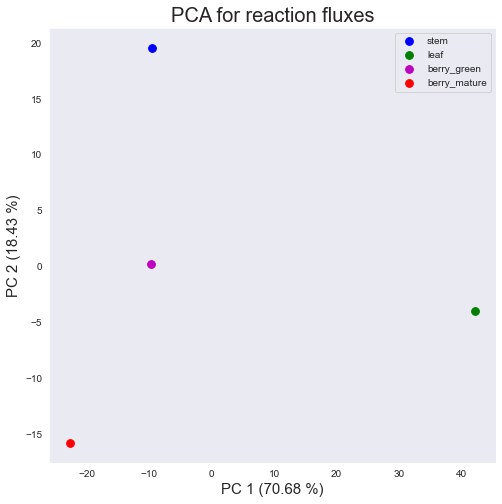

In [16]:
c1 = 'PC 1'
c2 = 'PC 2'

df_pca_fluxes_local2['factor'] = ['berry_green', 'berry_mature', 'leaf', 'stem']

plot_pca(data=df_pca_fluxes_local2, explained_variance=explained_variance_local2, c1=c1, c2=c2, title='PCA for reaction fluxes',
         name_fig='pca_local2')


## PCA for reaction fluxes for differentially expressed reactions

(4, 4001)

In [23]:
diff_reacs = get_dfa_reactions('')

In [26]:
df_fluxes_def_local2_scaled = df_fluxes_def_local2_scaled[diff_reacs]
df_fluxes_def_local2_scaled.shape

(4, 693)

In [27]:
df_pca_fluxes_local2, explained_variance_local2 = run_pca(n_components=2, data=df_fluxes_def_local2_scaled)
df_pca_fluxes_local2

,PC 1,PC 2
berry_green,-8.311084,-4.001358
berry_mature,-8.437908,-4.858055
leaf,25.844302,0.181218
stem,-9.095310,8.678196


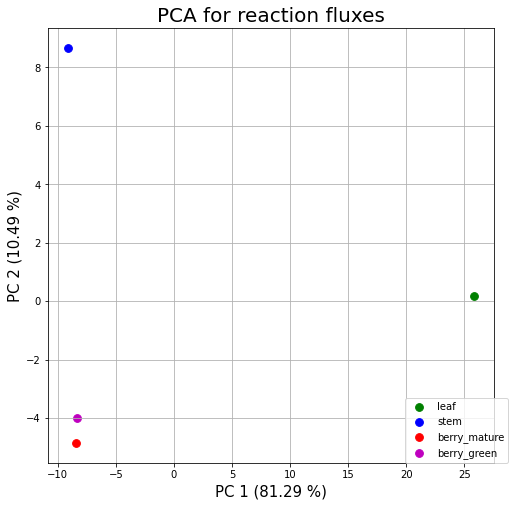

In [28]:
c1 = 'PC 1'
c2 = 'PC 2'

df_pca_fluxes_local2['factor'] = ['berry_green', 'berry_mature', 'leaf', 'stem']

plot_pca(data=df_pca_fluxes_local2, explained_variance=explained_variance_local2, c1=c1, c2=c2, title='PCA for reaction fluxes',
         name_fig='pca_local2_diff')

## PCA for sampling fluxes for differentially expressed reactions

In [35]:
sampling_file_local2 = os.path.join(MODELPATH, 'all_sampling.csv')
df_sampling_local2 = pd.read_csv(sampling_file_local2, index_col= 0)
df_sampling_local2.shape

(4000, 4020)

In [36]:
scaler = StandardScaler()
sampling_def_local2_scaled = scaler.fit_transform(df_sampling_local2)
df_sampling_def_local2_scaled = pd.DataFrame(sampling_def_local2_scaled, columns=df_sampling_local2.columns,
                                       index=df_sampling_local2.index)

In [37]:
diff_reacs = get_dfa_reactions('')

In [38]:
df_sampling_def_local2_scaled = df_sampling_def_local2_scaled[diff_reacs]
df_sampling_def_local2_scaled.shape

(4000, 1004)

In [45]:
df_pca_sampling_local2, explained_variance_local2, names, loadings = run_pca(n_components=2, data=df_sampling_def_local2_scaled)
df_pca_sampling_local2

,PC 1,PC 2
berry_green_sampling.csv_0,-5.749699,-7.344049
berry_green_sampling.csv_1,-5.715951,-7.959411
berry_green_sampling.csv_2,-5.752645,-9.099620
berry_green_sampling.csv_3,-8.644920,-6.286784
berry_green_sampling.csv_4,-7.848254,-6.812600
...,...,...
stem_sampling.csv_995,-8.799459,16.386095
stem_sampling.csv_996,-8.150151,15.176302
stem_sampling.csv_997,-8.082464,14.944842
stem_sampling.csv_998,-4.721898,21.469225


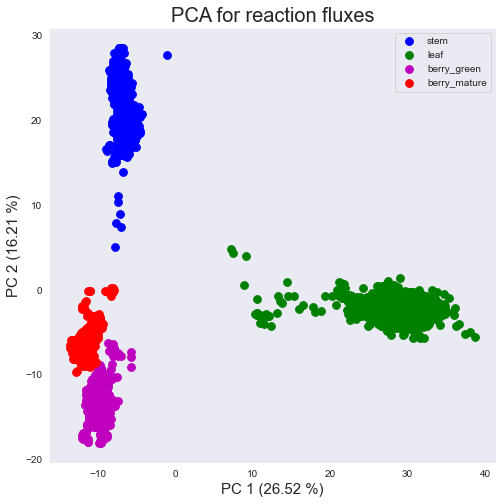

In [40]:
c1 = 'PC 1'
c2 = 'PC 2'

df_pca_sampling_local2['factor'] =  ['berry_green'] * 1000 + ['berry_mature'] * 1000 + ['leaf'] * 1000 + ['stem'] * 1000

plot_pca(data=df_pca_sampling_local2, explained_variance=explained_variance_local2, c1=c1, c2=c2, title='PCA for reaction fluxes',
         name_fig='pca_local2_diff_sampling')



In [27]:
pc1_loadings = loadings.sort_values(by='PC 1', ascending=False)[['PC 1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']
pc1_loadings = pc1_loadings.iloc[:30, :]
pc1_loadings

,Attribute,CorrelationWithPC1
0,RXN-15479__chlo,0.985914
1,PLASTOQUINOL--PLASTOCYANIN-REDUCTASE-RXN__chlo,0.985914
2,T_Light__chlo,0.985861
3,ATPSYN-RXN__chlo,0.985506
4,1.18.1.2-RXN__chlo,0.983718
5,EX_SUCROSE_drain,0.983351
6,PSII-RXN__chlo,0.980624
7,TI6900285__chlo__cyto,0.963690
8,EX_OXYGEN-MOLECULE_drain,0.959432
9,TO1000009__chlo__cyto,0.955778


In [28]:
pc2_loadings = loadings.sort_values(by='PC 2', ascending=False)[['PC 2']]
pc2_loadings = pc2_loadings.reset_index()
pc2_loadings.columns = ['Attribute', 'CorrelationWithPC1']
pc2_loadings = pc2_loadings.iloc[:100, :]
pc2_loadings

,Attribute,CorrelationWithPC1
0,GLUTATHIONE-REDUCT-NADPH-RXN__cyto,0.928797
1,1.8.5.1-RXN__cyto,0.928792
2,RXN-21402__cyto,0.928792
3,TI0000276__vacu__cyto,0.928278
4,TO0000276__vacu__cyto,0.928278
...,...,...
95,UDPREDUCT-RXN__cyto,0.649494
96,DUDPKIN-RXN__cyto,0.649494
97,TI3000489__cyto__extr,0.649150
98,TI3001088__cyto__extr,0.648993


### tsne without feature selection

In [41]:
df_tsne_sampling_local2 = run_tsne(n_components=2, data=df_sampling_def_local2_scaled)

C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


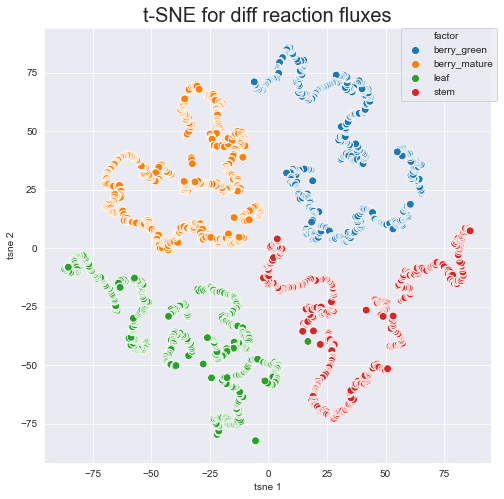

In [43]:
df_tsne_sampling_local2['factor'] = ['berry_green'] * 1000 + ['berry_mature'] * 1000 + ['leaf'] * 1000 + ['stem'] * 1000
plot_tsne(data=df_tsne_sampling_local2, name_fig='tsne_fluxes', title='t-SNE for diff reaction fluxes')

### tsne with PCA

C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


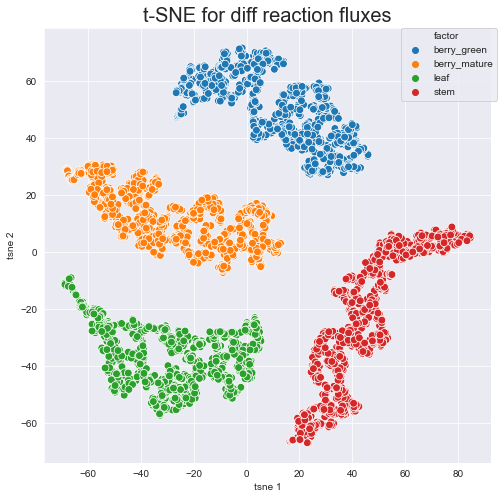

In [46]:
df_tsne_sampling_local2 = run_tsne(n_components=2, data=df_pca_sampling_local2)
df_tsne_sampling_local2['factor'] = ['berry_green'] * 1000 + ['berry_mature'] * 1000 + ['leaf'] * 1000 + ['stem'] * 1000
plot_tsne(data=df_tsne_sampling_local2, name_fig='tsne_fluxes_pca', title='t-SNE for diff reaction fluxes')

### tsne with truncatedSVD

In [58]:
df_svd_sampling_local2, explained_variance_local2, = run_truncatedsvd(n_components=20, data=df_sampling_def_local2_scaled)

C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


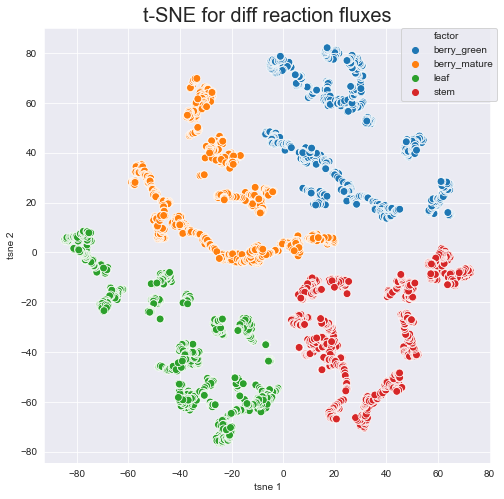

In [60]:
df_tsne_sampling_local2 = run_tsne(n_components=2, data=df_svd_sampling_local2)
df_tsne_sampling_local2['factor'] = ['berry_green'] * 1000 + ['berry_mature'] * 1000 + ['leaf'] * 1000 + ['stem'] * 1000
plot_tsne(data=df_tsne_sampling_local2, name_fig='tsne_fluxes_tsvd', title='t-SNE for diff reaction fluxes')

## Berry green vs Berry mature (after changing biomass components of berry mature)

In [18]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
sampling_berry = os.path.join(MODELPATH, 'berry_sampling.csv')
df_sampling_berry = pd.read_csv(sampling_berry, index_col= 0)
df_sampling_berry.shape

(2000, 3535)

In [4]:
scaler = StandardScaler()
sampling_berry_scaled = scaler.fit_transform(df_sampling_berry)
df_sampling_berry_scaled = pd.DataFrame(sampling_berry_scaled, columns=df_sampling_berry.columns,
                                       index=df_sampling_berry.index)

In [10]:
diff_reacs = get_dfa_reactions('')

In [11]:
df_sampling_berry_scaled = df_sampling_berry_scaled[diff_reacs]
df_sampling_berry_scaled.shape

(2000, 295)

In [12]:
df_pca_sampling_berry, explained_variance_berry, names_berry, loadings_berry = run_pca(n_components=2, data=df_sampling_berry_scaled)
df_pca_sampling_berry

,PC 1,PC 2
berry_green_sampling.csv_0,-8.786844,-11.014420
berry_green_sampling.csv_1,-8.765053,-11.064241
berry_green_sampling.csv_2,-8.929396,-10.405669
berry_green_sampling.csv_3,-8.401924,-7.860765
berry_green_sampling.csv_4,-8.284631,-7.825040
...,...,...
berry_mature_sampling.csv_995,13.055576,2.360383
berry_mature_sampling.csv_996,11.621526,2.057340
berry_mature_sampling.csv_997,12.436757,2.411695
berry_mature_sampling.csv_998,12.189058,3.508356


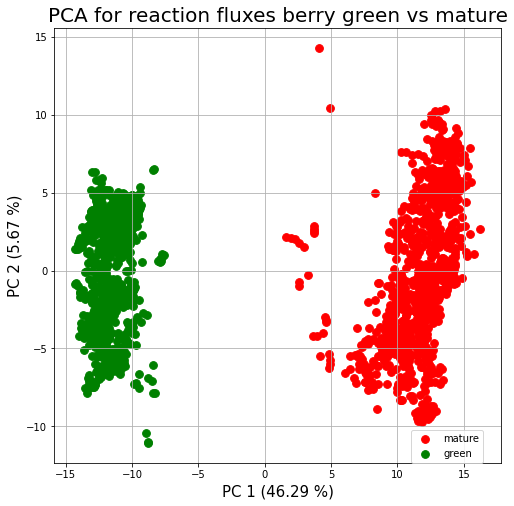

In [13]:
c1 = 'PC 1'
c2 = 'PC 2'

df_pca_sampling_berry['factor'] =  ['green'] * 1000 + ['mature'] * 1000

plot_pca(data=df_pca_sampling_berry, explained_variance=explained_variance_berry, c1=c1, c2=c2, title='PCA for reaction fluxes berry green vs mature',
         name_fig='pca_diff_sampling_berry_green_vs_mature')

In [14]:
names_berry = names_berry.transpose()

df_sorted = names_berry.sort_values(by='PC 1', ascending=False)
df_sorted = df_sorted[df_sorted['PC 1'] > 0]
df_sorted.head(30)

,PC 1,PC 2
RXN-7785__cyto,0.084703,0.013918
NITRATE-REDUCTASE-NADH-RXN__cyto,0.084346,0.014358
FERREDOXIN--NITRITE-REDUCTASE-RXN__chlo,0.084346,0.014358
TR0000075__chlo__cyto,0.084346,0.014358
EX_NITRATE_drain,0.084346,0.014358
ISOLEUCINE--TRNA-LIGASE-RXN__chlo,0.083849,0.002775
T_ILE-tRNAs__chlo,0.083849,0.002775
T_Charged-ILE-tRNAs__chlo,0.083849,0.002775
RXN-18353__cyto,0.082787,0.019057
RXN-602__cyto,0.082787,0.019057


In [15]:
pc1_loadings = loadings_berry.sort_values(by='PC 1', ascending=False)[['PC 1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']
pc1_loadings = pc1_loadings.iloc[:30, :]
pc1_loadings
# plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
# plt.title('PCA loading scores (first principal component)', size=20)
# plt.xticks(rotation='vertical')
# plt.show()

,Attribute,CorrelationWithPC1
0,RXN-7785__cyto,0.990028
1,NITRATE-REDUCTASE-NADH-RXN__cyto,0.985856
2,FERREDOXIN--NITRITE-REDUCTASE-RXN__chlo,0.985856
3,ISOLEUCINE--TRNA-LIGASE-RXN__chlo,0.980052
4,T_ILE-tRNAs__chlo,0.980052
5,RXN-602__cyto,0.967633
6,RXN-18353__cyto,0.967633
7,SERINE--PYRUVATE-AMINOTRANSFERASE-RXN__cyto,0.937527
8,T_GLYCOLLATE__mito,0.937522
9,ALANINE--GLYOXYLATE-AMINOTRANSFERASE-RXN__mito,0.937522


In [5]:
import seaborn as sns
%matplotlib inline
from sklearn.metrics import pairwise_distances
import pandas as pd
import os

C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


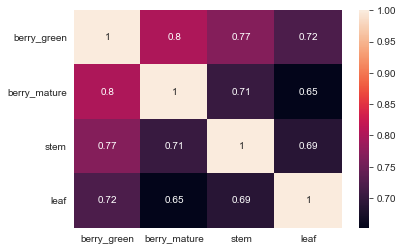

In [8]:
threshold_troppo = pd.read_csv(os.path.join(DATAPATH, 'Threshold_matrix_vvinif2021_RNAseq_Local2_0_3_4.csv'), index_col=0)

# calculate the distance based on jaccard similarity and subtract 1
# beacause a value of 1 in original means no similarity
dff = pd.DataFrame(data=1-pairwise_distances(threshold_troppo.to_numpy(), metric='jaccard'),
                   index=threshold_troppo.index,
                   columns=threshold_troppo.index)
# display as a heatmap
sns.heatmap(dff, annot=True)